## Data Pipeline

This section builds a data pipeline which includes data loading, preprocessing, and batching with DataLoader. We will use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) from scikit-learn. Before proceeding make sure to install scikit-learn and matplotlib from your Anaconda Powershell Prompt: **conda install scikit-learn -y**  (The `-y` flag automatically says "yes" to the installation, saving you a click!) 

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Note: If you encounter any error messages, such as:
- `No module named 'matplotlib'`
- `No module named 'pandas'`
- `No module named 'seaborn'`

You can open your Anaconda Powershell Prompt and install the missing libraries using the following commands:
- `conda install matplotlib -y`
- `conda install pandas -y`
- `conda install seaborn -y`

Once the libraries are installed, please restart your kernel

### Step 1: Load and explore the Iris dataset
------------------------------------------
The [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is a classic dataset in machine learning practice containing measurements of sepals and petals from three species of iris flowers.

In [49]:
from sklearn.datasets import load_iris

# load the dataset
iris = load_iris()

# extract features and target classes
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, target_names)

# Print the first few rows of the dataset to check its structure
print(iris_df.head())

# print to check the overall structure of our dataset
# and also to find how many classes we have
print(f"Dataset dimensions: {X.shape}")
print(f"Target classes: {target_names}")
print(f"Feature names: {feature_names}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Dataset dimensions: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We have known that we have 150 samples and 4 features in our dataset, now let us visualize the relationships between these features using a pair plot.
Additionally, we can also check the correlation matrix of the features to see how strongly the features are correlated with one another. 

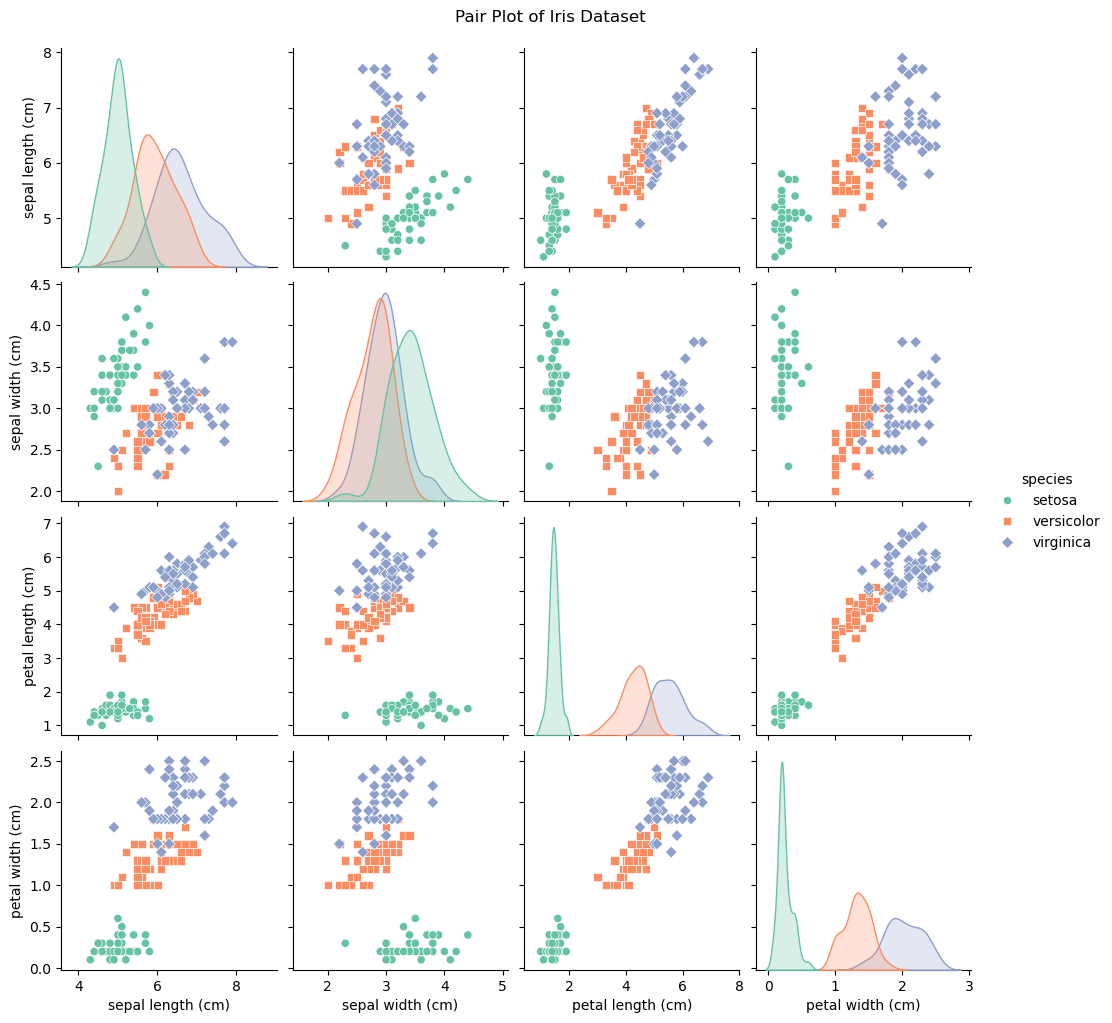

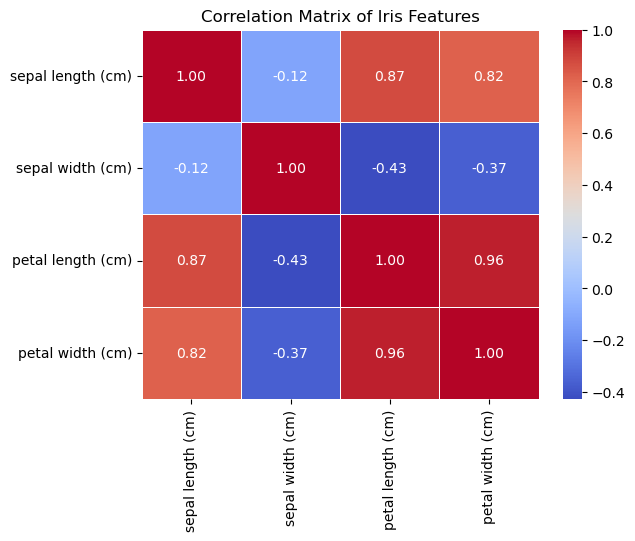

In [50]:
# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

# check the correlation matrix of the features
corr_matrix = iris_df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Iris Features")
plt.show()

### Step 2: Split data into training and testing sets
------------------------------------------

We now divide our data into training and testing datasets in 80:20 ratio. This means, we will be using 80% of our data for training and 20% for evaluating the model's performance.data

In [51]:
# split data into training and testing sets with a seed for reproducibility
# X_train here contains training set for feature data
# y_train here contains target labels for training set, or what we want to predict, or the ground truth

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Standarise or scale the feature data
------------------------------------------

In [52]:
# standardise the feature data
scaler = StandardScaler()

# learn the parameter from training data and fit a transformer to it
# fit() - computes mean and std deviation to scale
# transform() - used to scale using mean and std deviation calculated using fit()
# fit_transform() - combination of both fit() and transform()
X_train = scaler.fit_transform(X_train)

# no fit() as we want to avoid data leakage
X_test = scaler.transform(X_test)

Now let us convert feature matrices to FloatTensor (tensor type for numerical data) and LongTensor (tensor type for integer labels).

In [53]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)


X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

### Step 4: Create tensor dataset and [data loader](https://www.eletreby.me/blog/getting-started-with-pytorch-dataset-and-dataloader) for batch training
-------------------------------------------------------

The `DataLoader` class wraps the `Dataset` class and handles batching, shuffling, and utilise Python's multiprocessing to speed up data retrieval.

In [54]:
# Combine features and labels into a single dataset
batch_size = 30
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# Print batch information
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Number of training batches: 4
Number of test batches: 1


Finally, our dataset is ready for model definition, training, and evaluation.

Next section will explain the model that we will utilise.